In [23]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

In [7]:
df = pd.read_csv('data/explored_cmv&unpop_data')

In [8]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
xgb = pickle.load(open('models/XGBoost.sav', 'rb'))

In [10]:
xgb.feature_importances_

array([0.00075911, 0.00079847, 0.00078091, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [13]:
x_list = df.select_dtypes(exclude = np.dtype('O')).columns.tolist()

In [19]:
xgb_zipped = zip(x_list, xgb.feature_importances_)

In [20]:
xgb_features_dict = {entry[0]: entry[1] for entry in xgb_zipped}

In [21]:
#credit to: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
xgb_features_dict_sorted = {k: v for k, v in sorted(xgb_features_dict.items(), key=lambda item: item[1], reverse = True)}

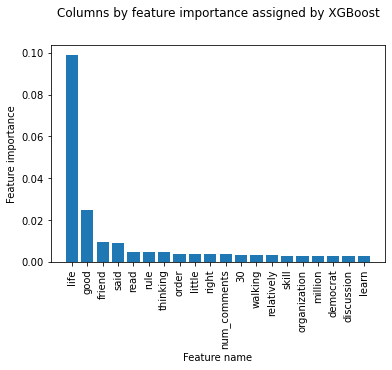

In [27]:
keys = list(xgb_features_dict_sorted.keys())
values = list(xgb_features_dict_sorted.values())

plt.bar(keys[:20], values[:20])
plt.xticks(rotation = 90)
plt.title("Columns by feature importance assigned by XGBoost", y= 1.1)
plt.ylabel("Feature importance")
plt.xlabel("Feature name")
plt.show()